# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


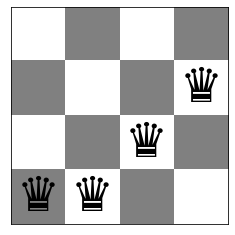

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [3]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


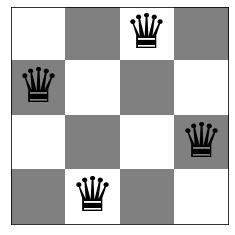

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

In [189]:
def possibleMoves(i, board):
    #find possible moves for the search
    moves = [x for x in range(len(board)) if x != i]
    return moves


In [208]:

def STAH_climbing(board, verbose=False):
    curr_board = board.copy()
    current_min_conflicts = conflicts(board)

    for column in range(len(board)):
        column_moves = possibleMoves(curr_board[column], curr_board)

        for i in column_moves:
            test_move = curr_board.copy()
            test_move[column] = i

            if conflicts(test_move) < current_min_conflicts:
                curr_board = test_move
                current_min_conflicts = conflicts(test_move)
    if(verbose == True):
        show_board(curr_board)
    return curr_board




Board with 4 conflicts.


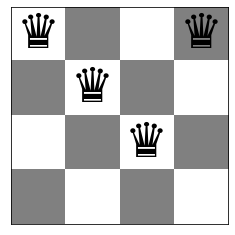

Board with 1 conflicts.


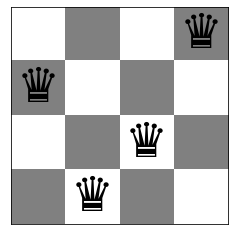

In [228]:
board = random_board(4)
#steepest_hill_climbing(board)
show_board(board)
x = STAH_climbing(board, True)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [304]:
def generateStates(board):

    new_states = list()

    new_vectors = np.eye(len(board), len(board), dtype=int)

    # Append vector sum and difference to list
    for i in range(len(board)):
        add = np.add(board, new_vectors[i])
        subtract = np.subtract(board, new_vectors[i])

        # Discard invalid boards with out of bounds choices
        if -1 not in add and len(board) not in add:
            new_states.append(add)
        if -1 not in subtract and len(board) not in subtract:
            new_states.append(subtract)

    return new_states

def stochastic_hill_climbing(SH_board, verbose=False):
    while conflicts(SH_board) > 0:
        #generate possible states
        curr_states = generateStates(SH_board)
        if True not in [conflicts(i) < conflicts(SH_board) for i in curr_states]:
            break
        #choose a random move
        random_states = np.random.choice(range(len(curr_states)))
        #random moves
        random_possibilities = curr_states[random_states]
        SH_board = random_possibilities

        if verbose == True:
            show_board(SH_board)
            break
    return SH_board


Board with 4 conflicts.


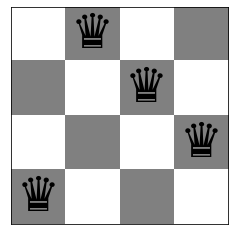

Board with 2 conflicts.


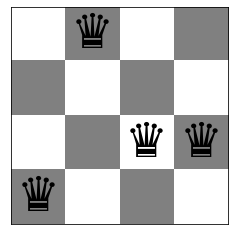

In [280]:
test_board = random_board(4)
show_board(test_board)
x = stochastic_hill_climbing(test_board, True)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [338]:
def SHC2_climb(board, verbose=False):
    tries = 0

    current_board = board.copy()
    while(conflicts(current_board) > 0 and tries < 55):
        tries += 1
        minimum = conflicts(board)
        for i in range(len(board)):
            possible_moves = generateStates(current_board)
            random_states = np.random.choice(range(len(possible_moves)))
            random_boardSH2 = possible_moves[random_states]
            if conflicts(random_boardSH2) < minimum:
                minimum = conflicts(random_boardSH2)
                current_board = random_boardSH2
    if verbose == True:
        show_board(current_board)
    return current_board

Board with 6 conflicts.


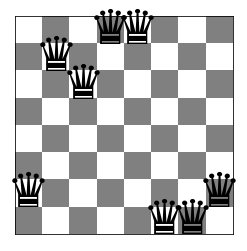

Board with 4 conflicts.


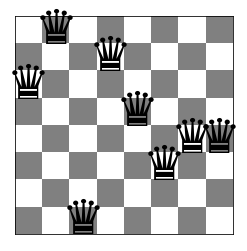

In [332]:
new_board = random_board(8)
show_board(new_board)
x = SHC2_climb(new_board, True)



## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

In [353]:
def HCrandom_restarts(algo, optimal_board, verbose=False):

    #optimal_board = random_board(n)
    if verbose == True:
        show_board(optimal_board)
    current = optimal_board.copy()
    for i in range(100):
        optimal_board = algo(optimal_board)
        if conflicts(optimal_board) < conflicts(current):
            current = optimal_board
        if conflicts(current) == 0:
            return current
        optimal_board = random_board(len(optimal_board))

    return current


Board with 5 conflicts.


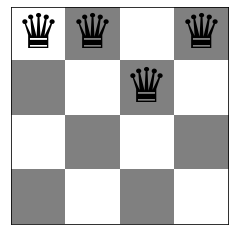

Board with 0 conflicts.


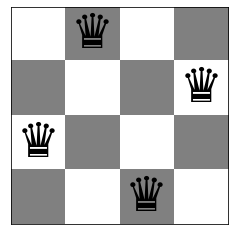

Board with 5 conflicts.


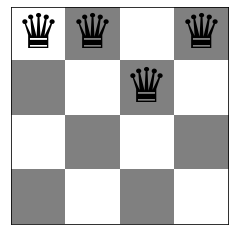

Board with 0 conflicts.


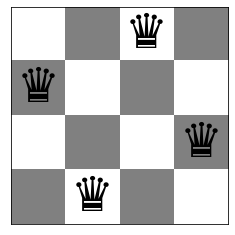

Board with 5 conflicts.


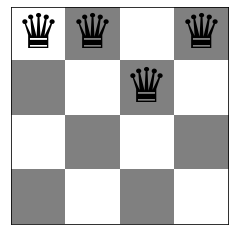

Board with 0 conflicts.


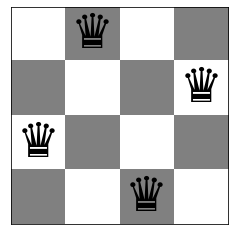

In [385]:
HC_board = random_board(4)
x = HCrandom_restarts(STAH_climbing, HC_board, True)
show_board(x)
y = HCrandom_restarts(SHC2_climb, HC_board, True)
show_board(y)
z = HCrandom_restarts(stochastic_hill_climbing, HC_board, True)
show_board(z)





## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [384]:
import time

# INITIATING TEST
#temp_board = random_board(4)
runs = 100
size_board = 8
t0_STAH = time.time()
for i in range(runs):
    temp_board = random_board(size_board)
    STAH_climbing(temp_board)
t1_STAH = time.time()
STAH_time = (t1_STAH - t0_STAH)/runs
print(f"This Steepest-Ascend Hill Climb took: {STAH_time * 1e3} milliseconds")

t0_Stochastic = time.time()
for i in range(runs):
    temp_board = random_board(size_board)
    stochastic_hill_climbing(temp_board)
t1_Stochastic= time.time()
Stochastic_time = (t1_Stochastic - t0_Stochastic)/runs
print(f"This Stochastic Hill Climb took: {Stochastic_time * 1e3} milliseconds")

t0_SHC2 = time.time()
for i in range(runs):
    temp_board = random_board(size_board)
    SHC2_climb(temp_board)
t1_SHC2 = time.time()
SHC2_time = (t1_SHC2 - t0_SHC2)/runs
print(f"This Stochastic Hill Climb 2 took: {SHC2_time * 1e3} milliseconds")




This Steepest-Ascend Hill Climb took: 2.22611665725708 milliseconds
This Stochastic Hill Climb took: 51.87753438949585 milliseconds
This Stochastic Hill Climb 2 took: 194.16486978530884 milliseconds


In [407]:
import time
import pandas as pd
import matplotlib.pyplot as plt

def performanceSimulation(runs, size_board):
    performance = {
        'SAHC' : np.zeros(shape = [runs]),
        'SAHC_RR' : np.zeros(shape = [runs]),
        'SHC' : np.zeros(shape = [runs]),
        'SHC_RR' : np.zeros(shape = [runs]),
        'SHC2' : np.zeros(shape = [runs]),
        'SHC2_RR' : np.zeros(shape = [runs]),
    }
    runtime_performance = {
        'SAHC' : np.zeros(shape = [runs]),
        'SAHC_RR' : np.zeros(shape = [runs]),
        'SHC' : np.zeros(shape = [runs]),
        'SHC_RR' : np.zeros(shape = [runs]),
        'SHC2' : np.zeros(shape = [runs]),
        'SHC2_RR' : np.zeros(shape = [runs]),
    }




    for i in range(runs):
        current_board = random_board(size_board).copy()

        t0 = time.time()
        performance['SAHC'][i] = \
            conflicts(STAH_climbing(current_board))
        t1 = time.time()
        runtime_performance['SAHC'][i] = t1-t0

        t0 = time.time()
        performance['SAHC_RR'][i] = conflicts\
            (HCrandom_restarts(STAH_climbing, current_board))
        t1 = time.time()
        runtime_performance['SAHC_RR'][i] = t1-t0

        t0 = time.time()
        performance['SHC'][i] = \
            conflicts(stochastic_hill_climbing(current_board))
        t1 = time.time()
        runtime_performance['SHC'][i] = t1-t0

        t0 = time.time()
        performance['SHC_RR'][i] = conflicts(HCrandom_restarts
                                                 (stochastic_hill_climbing,current_board))
        t1 = time.time()
        runtime_performance['SHC_RR'][i] = t1-t0

        t0 = time.time()
        performance['SHC2'][i] = conflicts(SHC2_climb(current_board))
        t1 = time.time()
        runtime_performance['SHC2'][i] = t1-t0

        t0 = time.time()
        performance['SHC2_RR'][i] = conflicts\
            (HCrandom_restarts(SHC2_climb,current_board))
        t1 = time.time()
        runtime_performance['SHC2_RR'][i] = t1-t0

    # SHOW average conflicts
    performance_data = pd.DataFrame(performance)
    print(performance_data)
    means = np.mean(performance_data, axis = 0)

    plt.bar(means.keys(), means)
    plt.title(f'Algorithm Accuracy at size {size_board}')
    plt.ylabel("Average number of conflicts")
    plt.show()

    runtime_performance_data = pd.DataFrame(runtime_performance)
    print(runtime_performance_data)
    mean_performance = np.mean(runtime_performance_data, axis = 0)

    plt.bar(mean_performance.keys(), mean_performance)
    plt.title(f'Algorithm Time at size {size_board}')
    plt.ylabel("Average Time for size")
    plt.show()

   SAHC  SAHC_RR  SHC  SHC_RR  SHC2  SHC2_RR
0   1.0      0.0  3.0     0.0   0.0      0.0
1   0.0      0.0  2.0     0.0   2.0      0.0
2   0.0      0.0  2.0     0.0   0.0      0.0
3   0.0      0.0  3.0     0.0   0.0      0.0
4   1.0      0.0  3.0     0.0   3.0      0.0
5   0.0      0.0  2.0     0.0   0.0      0.0
6   0.0      0.0  2.0     0.0   0.0      0.0
7   0.0      0.0  3.0     0.0   0.0      0.0
8   2.0      0.0  3.0     0.0   3.0      0.0
9   0.0      0.0  3.0     0.0   0.0      0.0


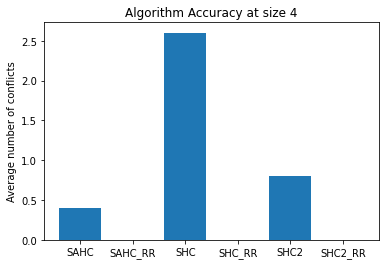

       SAHC   SAHC_RR       SHC    SHC_RR      SHC2   SHC2_RR
0  0.001002  0.004002  0.005997  0.029002  0.033039  0.003001
1  0.000000  0.000999  0.000000  0.036999  0.073250  0.157674
2  0.000000  0.001002  0.000998  0.055001  0.037426  0.005004
3  0.000000  0.000995  0.004001  0.018001  0.002999  0.089000
4  0.001001  0.001002  0.001002  0.004995  0.059001  0.070002
5  0.000997  0.000000  0.002002  0.000000  0.001000  0.001999
6  0.000999  0.000000  0.003006  0.025995  0.001001  0.003002
7  0.000000  0.000997  0.001001  0.013999  0.011004  0.010999
8  0.000000  0.001997  0.001006  0.020998  0.060106  0.120001
9  0.000000  0.000999  0.005000  0.007998  0.035001  0.009000


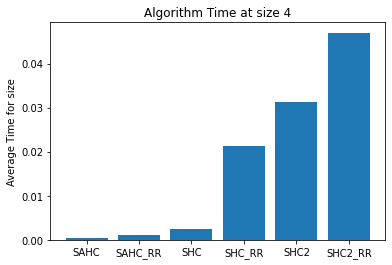

   SAHC  SAHC_RR  SHC  SHC_RR  SHC2  SHC2_RR
0   1.0      0.0  2.0     1.0   1.0      0.0
1   1.0      0.0  3.0     1.0   3.0      0.0
2   0.0      0.0  4.0     1.0   3.0      0.0
3   3.0      0.0  4.0     1.0   2.0      0.0
4   2.0      0.0  3.0     1.0   2.0      0.0
5   2.0      0.0  7.0     1.0   7.0      0.0
6   2.0      0.0  2.0     1.0   2.0      0.0
7   2.0      0.0  5.0     1.0   1.0      0.0
8   1.0      0.0  2.0     1.0   2.0      0.0
9   2.0      0.0  3.0     1.0   4.0      0.0


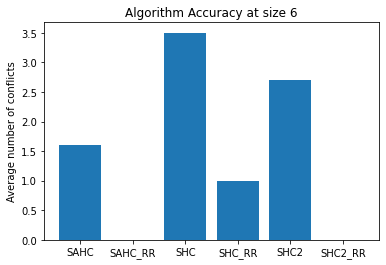

       SAHC   SAHC_RR       SHC    SHC_RR      SHC2   SHC2_RR
0  0.001000  0.005000  0.032001  1.951625  0.130000  0.660090
1  0.001004  0.044663  0.003998  1.683405  0.113996  0.340461
2  0.000999  0.001000  0.021999  1.401819  0.118874  1.380530
3  0.001005  0.008993  0.016999  1.544358  0.150703  1.127082
4  0.000999  0.020999  0.002001  1.987312  0.177869  2.150757
5  0.001001  0.006998  0.001002  1.236819  0.126068  0.978176
6  0.001006  0.016994  0.040999  1.438685  0.151116  0.659739
7  0.001513  0.029688  0.015016  1.890466  0.128000  2.921528
8  0.000998  0.013000  0.022002  2.141590  0.127000  0.456949
9  0.001002  0.003999  0.004002  2.250628  0.145522  1.422697


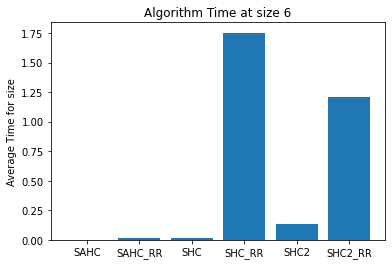

   SAHC  SAHC_RR  SHC  SHC_RR  SHC2  SHC2_RR
0   2.0      0.0  4.0     2.0   3.0      0.0
1   1.0      0.0  8.0     2.0   3.0      0.0
2   1.0      0.0  6.0     2.0   4.0      0.0
3   0.0      0.0  4.0     2.0   3.0      0.0
4   3.0      0.0  4.0     2.0   4.0      0.0
5   2.0      0.0  5.0     1.0   0.0      0.0
6   2.0      0.0  4.0     2.0   2.0      0.0
7   2.0      0.0  7.0     1.0   3.0      0.0
8   2.0      0.0  4.0     2.0   3.0      0.0
9   2.0      0.0  7.0     2.0   3.0      0.0


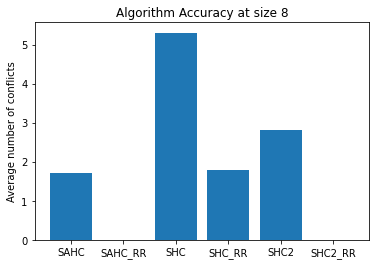

       SAHC   SAHC_RR       SHC    SHC_RR      SHC2   SHC2_RR
0  0.003000  0.030999  0.210806  6.782123  0.226446  6.921026
1  0.003000  0.006000  0.114004  6.636090  0.249881  8.520052
2  0.005002  0.115999  0.008001  8.705824  0.229456  1.581885
3  0.002997  0.003002  0.005997  7.079919  0.189517  0.032000
4  0.002000  0.028000  0.005000  6.549105  0.189789  5.626827
5  0.002003  0.036996  0.030001  4.335619  0.091001  0.157875
6  0.002001  0.055893  0.011999  5.205443  0.158999  0.085001
7  0.001999  0.052998  0.100000  4.894494  0.156996  2.194202
8  0.002000  0.006999  0.068001  4.730631  0.147517  1.905447
9  0.001000  0.011000  0.018999  5.509237  0.150809  0.173997


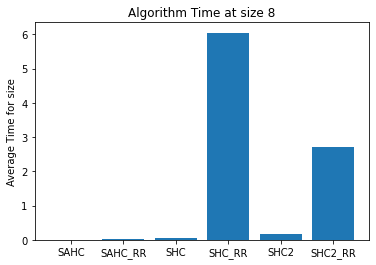

In [409]:
performanceSimulation(10, 4)
performanceSimulation(10, 6)
performanceSimulation(10, 8)

I found that overall, steepest-ascend hill climbing outperformed both stochastic hill climbing and stochastic hill climbing 2 in both time and accuracy as the size increased.

Also, in all algorithms, the random restarts performed the best in terms of performance and minimizing conflicts.

I also attempted to calculate the performance at size 24, but the time to find the performance was beyond a reasonable amount of time.


## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [404]:
def simulatedAnnealing(n, verbose=False):
    board = random_board(n)
    min_conflicts = conflicts(board)
    lowest_limit = 1E-6
    if verbose is True:
        show_board(board)

    i = 0 # steps counter
    while conflicts(board) > 0:
        # get temperature
        temperature = schedule(i)
        if temperature < lowest_limit:
            break
        # get neighbor move
        index = np.random.randint(0, n)
        row = np.random.randint(0, n)
        og = (index, board[index]) #column then row
        board[index] = row
        compare_conflicts = conflicts(board) - min_conflicts

        if compare_conflicts < 0:
            min_conflicts = conflicts(board)
        elif np.exp((compare_conflicts* -1)/temperature) > np.random.rand():
            min_conflicts = conflicts(board)

        else: # move board to original position
            board[og[0]] = og[1]
        i += 1
    if verbose:
        print(show_board(board))
    if verbose:
        print("final conflicts:", conflicts(board))
    return board

def schedule(i):
    # temperature schedule function
    const = 5
    alpha = .98
    return const * (alpha**i)



Board with 1 conflicts.


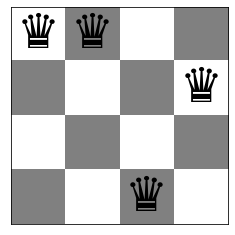

Board with 0 conflicts.


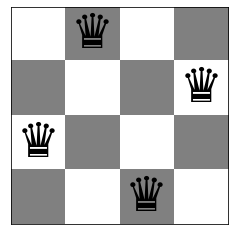

None
final conflicts: 0


In [405]:
x = simulatedAnnealing(4, True)

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [10]:
# Code and description go here